In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [4]:
N = 1000 # número de muestras
gaussian_quantiles = make_gaussian_quantiles(
    mean = None, # media de la distribución
    cov = 0.1, # varianza de la distribución
    n_samples = N, # número de muestras
    n_features = 2, # número de características
    n_classes = 2, # número de clases
    shuffle = True, # mezclar las muestras
    random_state = None # semilla para la generación de números aleatorios
)

X, Y = gaussian_quantiles

In [5]:
X.shape, Y.shape

((1000, 2), (1000,))

In [6]:
Y = Y.reshape(N, 1)
Y.shape

(1000, 1)

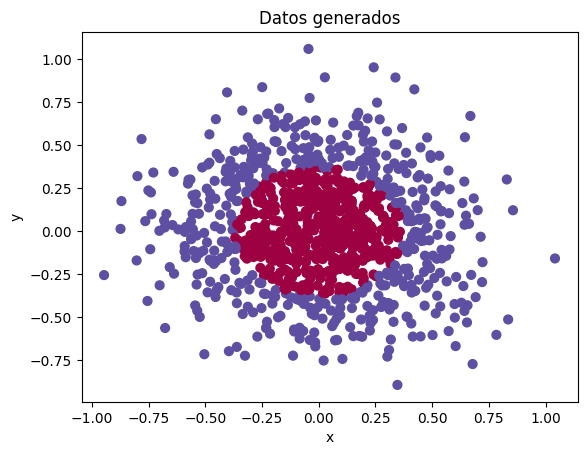

In [15]:
plt.scatter(
    X[:, 0], # coordenada x
    X[:, 1], # coordenada y
    c = Y, # color de los puntos
    s = 40, # tamaño de los puntos
    cmap = plt.cm.Spectral # mapa de colores
)

plt.title('Datos generados')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

funciones de activacion Sigmoide y ReLU

In [16]:
# función de activación sigmoide
def sigmoid(x, deriv = False):
    if deriv == True:
        return np.exp(-x) / ((1 + np.exp(-x)) ** 2)
    else:
        return 1 / (1 + np.exp(-x))

# función de activación ReLU
relu = lambda x, deriv = False: np.where(x > 0, 1, 0) if deriv else np.where(x > 0, x, 0)

Funcion de perdida

In [94]:
# funcion de perdida mse
mse = lambda y, y_hat, deriv = False: 2 * (y_hat - y) if deriv else np.mean((y_hat - y) ** 2)

In [30]:
def initialize_parameters_deep(layers_dims):
    parameters = {}
    L = len(layers_dims)

    for l in range(0, L - 1):
        parameters['W' + str(l + 1)] = (np.random.rand(layers_dims[l], layers_dims[l + 1]) * 2) - 1
        parameters['b' + str(l + 1)] = (np.random.rand(1, layers_dims[l + 1]) * 2) - 1

    return parameters

Esta función sirve para inicializar los parámetros de una red neuronal con varias capas. Recibe como entrada una lista llamada `layers_dims` que contiene el número de neuronas que tiene cada capa de la red neuronal, incluyendo la capa de entrada y la capa de salida. La función devuelve un diccionario llamado `parameters` que contiene los pesos y los sesgos (bias) para cada capa de la red neuronal.

El diccionario parameters se inicializa vacío al principio. Luego, la función utiliza un bucle for para inicializar los pesos y los sesgos para cada capa de la red neuronal, excepto la capa de entrada. El bucle comienza en cero y termina en `L-1`, donde `L` es la longitud de la lista `layers_dims`.

Dentro del bucle, la función utiliza la función `np.random.rand()` para inicializar los pesos y los sesgos. Los pesos se inicializan con una distribución uniforme aleatoria entre -1 y 1 multiplicada por 2, mientras que los sesgos se inicializan con una distribución uniforme aleatoria entre -1 y 1. Los pesos y sesgos se almacenan en el diccionario `parameters`.

La razón por la que se multiplica por 2 y se resta 1 en la inicialización de los pesos y los sesgos es para generar valores aleatorios entre -1 y 1.

La función `np.random.rand()` genera números aleatorios en el intervalo `[0, 1)`. Al multiplicar por 2, los valores resultantes se encuentran en el intervalo `[0, 2)`. Luego, al restar 1, los valores resultantes se encuentran en el intervalo `[-1, 1)`. De esta manera, se obtienen valores aleatorios que pueden ser tanto positivos como negativos, y que se encuentran en un rango que es simétrico alrededor de cero.

Esta técnica de inicialización de pesos y sesgos se conoce como "inicialización aleatoria uniforme" y es una de las técnicas más comunes para inicializar los parámetros de una red neuronal.

Finalmente, la función devuelve el diccionario parameters con los pesos y los sesgos inicializados para cada capa de la red neuron

In [31]:
layers_dims = [2, 4, 8, 1]
parameters = initialize_parameters_deep(layers_dims)
parameters

{'W1': array([[-0.1362691 , -0.43919857, -0.58732588,  0.23005828],
        [ 0.31038129, -0.55730902, -0.77098513, -0.88607917]]),
 'b1': array([[-0.93390578, -0.41162456, -0.17729196,  0.97754768]]),
 'W2': array([[-0.86041441, -0.53355924,  0.59086435,  0.25454005,  0.26322278,
         -0.11624451, -0.81239866, -0.23301565],
        [-0.89363919, -0.78874459,  0.93634689,  0.88251232,  0.80545483,
         -0.21226226, -0.12479217, -0.55185972],
        [ 0.66522981,  0.14428813, -0.56736899,  0.3069409 ,  0.67071713,
         -0.36641728,  0.34163132,  0.57345448],
        [-0.99563656,  0.2200335 ,  0.65509212,  0.5477702 , -0.33600039,
         -0.28040508, -0.3788341 ,  0.25691762]]),
 'b2': array([[ 0.05656157, -0.75619742, -0.19561687, -0.70693393,  0.86306431,
          0.17279921, -0.24884029, -0.75127573]]),
 'W3': array([[ 0.22636438],
        [ 0.68547027],
        [-0.41349244],
        [ 0.89979143],
        [-0.97735245],
        [-0.50396776],
        [ 0.3738446 ],


In [32]:
parameters['W1'].shape, parameters['b1'].shape

((2, 4), (1, 4))

In [33]:
X.shape, Y.shape

((1000, 2), (1000, 1))

In [36]:
np.dot(X, parameters['W1']).shape

(1000, 4)

In [39]:
np.dot(np.dot(X, parameters['W1']), parameters['W2']).shape

(1000, 8)

In [95]:
def train(x_data, learning_rate, parameters, training = True):
    # forward propagation
    parameters['A0'] = x_data # entrada

    parameters['Z1'] = np.dot(parameters['A0'], parameters['W1']) + parameters['b1'] # capa oculta 1 (z = wx + b) 
    parameters['A1'] = relu(parameters['Z1']) # capa oculta 1 (a = f(z)) 

    parameters['Z2'] = np.dot(parameters['A1'], parameters['W2']) + parameters['b2'] 
    parameters['A2'] = relu(parameters['Z2'])

    parameters['Z3'] = np.dot(parameters['A2'], parameters['W3']) + parameters['b3']
    parameters['A3'] = sigmoid(parameters['Z3'])

    output = parameters['A3']

    if training:
    # backward propagation

        parameters['dZ3'] = mse(Y, output, deriv = True) * sigmoid(parameters['A3'], deriv = True)
        parameters['dW3'] = np.dot(parameters['A2'].T, parameters['dZ3'])

        parameters['dZ2'] = np.dot(parameters['dZ3'], parameters['W3'].T) * relu(parameters['A2'], deriv = True)
        parameters['dW2'] = np.dot(parameters['A1'].T, parameters['dZ2'])

        parameters['dZ1'] = np.dot(parameters['dZ2'], parameters['W2'].T) * relu(parameters['A1'], deriv = True)
        parameters['dW1'] = np.dot(parameters['A0'].T, parameters['dZ1'])

        # Gradient Descent

        parameters['W3'] = parameters['W3'] - parameters['dW3'] * learning_rate # learning rate
        parameters['b3'] = parameters['b3'] - np.mean(parameters['dZ3'], axis = 0, keepdims = True) * learning_rate

        parameters['W2'] = parameters['W2'] - parameters['dW2'] * learning_rate # learning rate
        parameters['b2'] = parameters['b2'] - np.mean(parameters['dZ2'], axis = 0, keepdims = True) * learning_rate

        parameters['W1'] = parameters['W1'] - parameters['dW1'] * learning_rate # learning rate
        parameters['b1'] = parameters['b1'] - np.mean(parameters['dZ1'], axis = 0, keepdims = True) * learning_rate 

    return output

In [111]:
layers_dims = [2, 8, 8, 1]
params = initialize_parameters_deep(layers_dims)
errors = []
for _ in range(60000):
    output = train(X, 0.0001, params)
    if _ % 25 == 0:
        print('Error: ', mse(Y, output))
        errors.append(mse(Y, output))

Error:  0.2883010511678484
Error:  0.2731933988997646
Error:  0.26675953819476683
Error:  0.2629306495783189
Error:  0.2600649273301258
Error:  0.25776588594398586
Error:  0.25579057338375155
Error:  0.2539941604510095
Error:  0.2523345877815029
Error:  0.25093183677969794
Error:  0.24969982240227787
Error:  0.2485726948643465
Error:  0.2475283609815371
Error:  0.2465212007864776
Error:  0.24553050715207914
Error:  0.24454594950085912
Error:  0.24355622854552367
Error:  0.24253518102333466
Error:  0.24141192910105394
Error:  0.24001979000620446
Error:  0.23844027366524415
Error:  0.23709576544777763
Error:  0.23585372665303947
Error:  0.23460445118250112
Error:  0.23325700333866262
Error:  0.23184269740365102
Error:  0.23039100364486728
Error:  0.2289119696307136
Error:  0.22739759564383066
Error:  0.2258297324472098
Error:  0.22425131986009425
Error:  0.22264985440206544
Error:  0.22100917555933294
Error:  0.2193273496688752
Error:  0.2175823341886885
Error:  0.2157778273852022
Error:

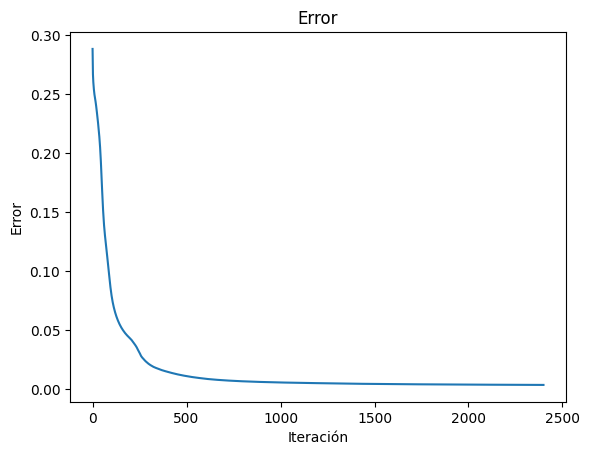

In [112]:
plt.plot(errors)
plt.title('Error')
plt.xlabel('Iteración')
plt.ylabel('Error')
plt.show()

In [113]:
data_test = (np.random.rand(1000, 2) * 2) - 1

y = train(data_test, 0.0001, params, training = False)

In [114]:
y = np.where(y > 0.5, 1, 0)

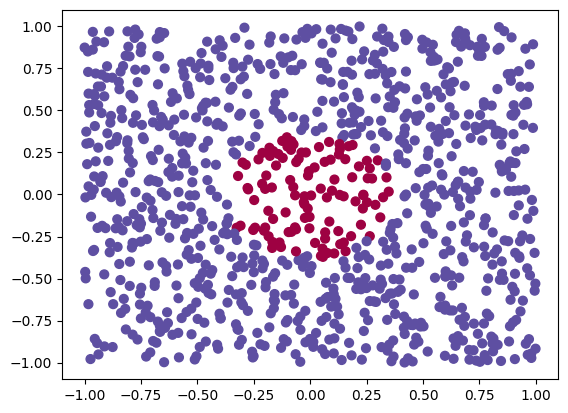

In [115]:
plt.scatter(
    data_test[:, 0], # coordenada x
    data_test[:, 1], # coordenada y
    c = y[:, 0],
    s = 40, # tamaño de los puntos
    cmap = plt.cm.Spectral # mapa de colores
)